In [56]:
import numpy as np
from scipy.stats import truncnorm, beta
import statsmodels.api as sm

N = 100
T = 100
mean = 0.5
std = 0.1
left = 0
right = 1
a, b = (left - mean) / std, (right - mean) / std
samples = truncnorm.rvs(a=a, b=b, loc=mean, scale=std, size=(T,N))
ord_stats = np.sort(samples, 1)

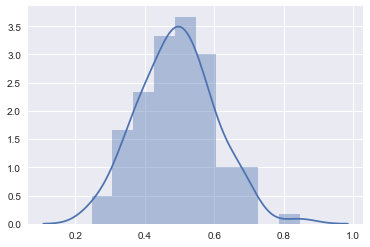

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# plotting pdf of X ##
sns.distplot(samples[0, :], bins=10, norm_hist=True)

## NOTE: pdf of X and Z are the same ##

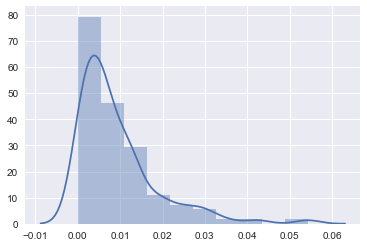

In [66]:
## plotting the pdf of U = F(Z) ##
U = norm.cdf(ord_stats, loc=mean, scale=std)
sns.distplot(U[:,0], bins=10, norm_hist=True)
# sns.distplot(U[:, 50], bins=10)

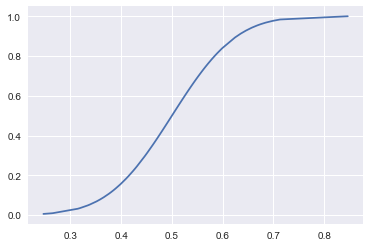

In [59]:
## plotting Z vs F(Z) ##
plt.plot(ord_stats[0,:], U[0,:])

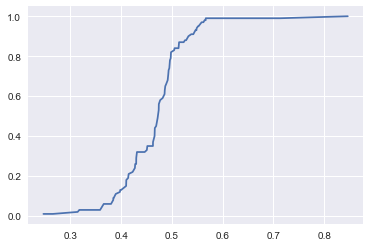

In [60]:
import statsmodels.api as sm
ord_stats_cdf = sm.distributions.empirical_distribution.ECDF(ord_stats[0,:])
x = np.linspace(min(ord_stats[0,:]), max(ord_stats[0,:]), num=N)
U_hat = ord_stats_cdf(x)

## plotting Z vs F(Z) ##
plt.plot(ord_stats[0,:], U_hat)

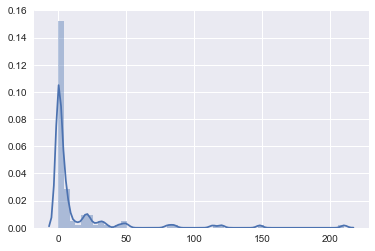

In [63]:
cdf_values = U_hat
ord_values = np.hstack((0.0, ord_stats[0,:]))
cdf_values = np.hstack((0.0, cdf_values))
numerator = np.diff(cdf_values)
denominator = np.diff(ord_values)

pdf_values = numerator/denominator
sns.distplot(pdf_values)

In [64]:
est_mean = np.sum(np.multiply(ord_stats[0,:], pdf_values))/np.sum(pdf_values)
print est_mean

0.457838400916
